In [7]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ecemg\OneDrive\Desktop\karbon\Plastic based Textiles in clothing industry.csv")

In [8]:
X = df[["Product_Type", "Production_Year"]]
y = df["Greenhouse_Gas_Emissions"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# One-hot encoding ve model pipeline
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), ["Product_Type"])],
    remainder='passthrough'
)

model = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

c:\Users\ecemg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Product_Type'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [11]:
future_years = [2025, 2026, 2027, 2028]
product_types = df["Product_Type"].unique()

future_data = pd.DataFrame([
    {"Product_Type": pt, "Production_Year": year}
    for pt in product_types
    for year in future_years
])

In [12]:
future_data["Predicted_Emissions"] = model.predict(future_data)

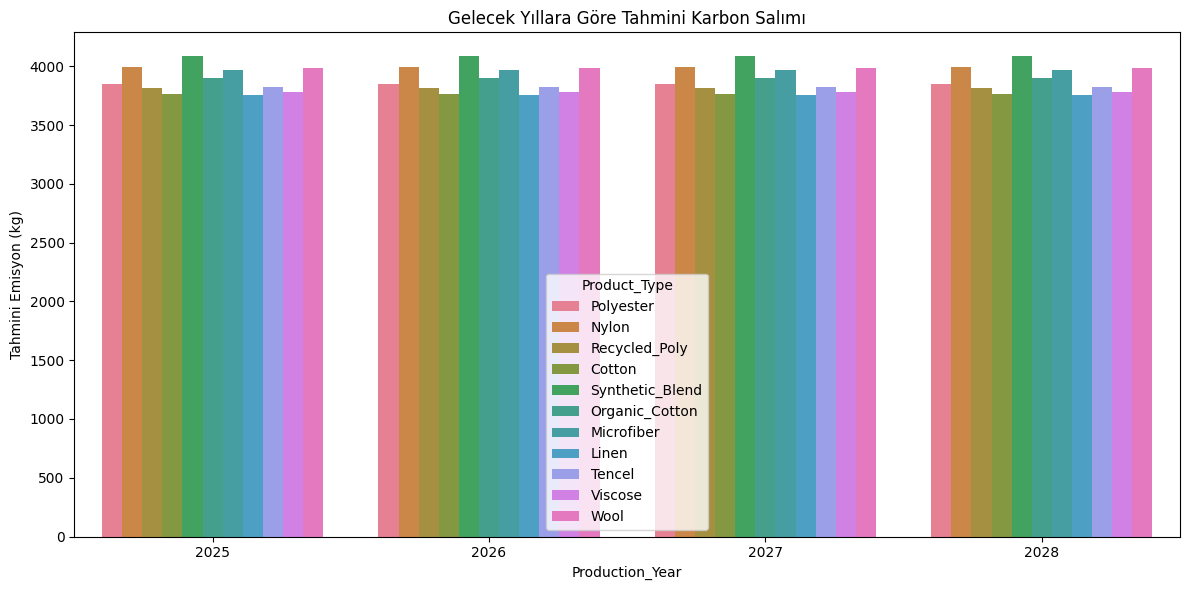

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=future_data, x="Production_Year", y="Predicted_Emissions", hue="Product_Type")
plt.title("Gelecek Yıllara Göre Tahmini Karbon Salımı")
plt.ylabel("Tahmini Emisyon (kg)")
plt.tight_layout()
plt.show()

In [ ]:
# Ürün tipine göre ortalama karbon salımı
avg_emissions = df.groupby("Product_Type")["Greenhouse_Gas_Emissions"].mean().sort_values(ascending=False)

print("Yüksek karbon salımı yapan ürün türleri:")
print(avg_emissions.head(5))  # En çok salan 5 ürün tipi

Yüksek karbon salımı yapan ürün türleri:
Product_Type
Synthetic_Blend    4063.656357
Cotton             3943.499184
Polyester          3902.595489
Wool               3891.148936
Tencel             3883.845626
Name: Greenhouse_Gas_Emissions, dtype: float64


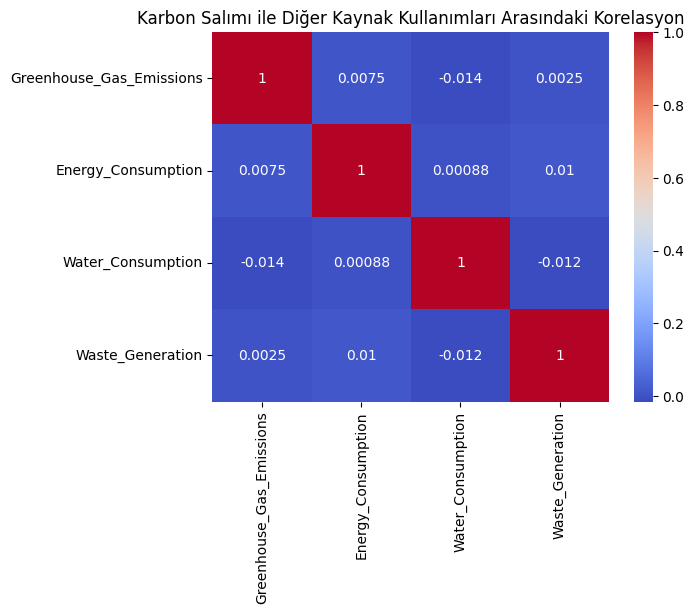

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon grafiği
corr = df[["Greenhouse_Gas_Emissions", "Energy_Consumption", "Water_Consumption", "Waste_Generation"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Karbon Salımı ile Diğer Kaynak Kullanımları Arasındaki Korelasyon")
plt.show()

In [16]:
# Daha önce eğitilmiş model üzerinden geleceğe dair tahminler yapılmıştı
# Tahmin sonuçlarını yeniden gruplandırarak analiz edelim:

future_risk = future_data.groupby("Product_Type")["Predicted_Emissions"].mean().sort_values(ascending=False)

print("Gelecek yıllarda en yüksek ortalama karbon salımına sahip ürünler:")
print(future_risk.head(5))

Gelecek yıllarda en yüksek ortalama karbon salımına sahip ürünler:
Product_Type
Synthetic_Blend    4083.874549
Nylon              3993.114030
Wool               3983.959025
Microfiber         3967.050913
Organic_Cotton     3901.104098
Name: Predicted_Emissions, dtype: float64
